# Biodiversity in National Parks

## Introduction
This project involves the analysis of data on variety species observed in a four different U.S. national parks. Here are a few questions that this project aims to answer:
* What is the distribution of conservation status for each species?
* Which taxonomic category is most prevalent and what is their distribution amongst the four parks?
* Are certain types of species more likely to be endangered?
* Are certain parks more likely to have endangered species?
* Are certain parks more likely to have certain types of species?
#### Data source:
Data, provided by Codecademy.com, are inspired by real data from the National Parks Service, but they are mostly fictional.


## Import libraries
To begin the project, import the necessary modules.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Import & Inspect Species Data
The data that will be used in this project are concentrated into the following csv files:
* observations.csv - holds recorded sightings of different species at four different national parks over the past 7 days
* species_info.csv - contains data about different species, their scientific names, and their conservation status

The csv files are opened using the pandas read_csv() method, and thus creating two DataFrames, named species and observations.

Below, the species dataframe is created and the first few rows are displayed using the .head() method. It contains the following columns of data:
* category: class of animal
* scientific_name: the scientific name of each species
* common_name: the common name of each species
* conservation_status: each species' current conservation status

Using .nunique(), we can see that the category column has only 7 unique values and the conservation_status column has only 4 unique values. Using .isna().any(), we can also see that the only column with null values in this data set is the conservation_status column.

In [3]:
#species data import and initial inspection
species = pd.read_csv('species_info.csv')
print('Data 1: Species')
display(species.head(10))
print(species.info())
print(species.nunique())
display(species.isna().any())

Data 1: Species


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

Because there are so few unique values for the category and conservation_status column, .unique() is used to display the unique values for both of these columns.

The null values in the conservation_status column are also examined. We find that there are 5633 null entries in the conservation_status column, and only about 3.28% of observed species have a conservation status.

In [4]:
print('Species Data: Unique Category Values')
display(species.category.unique())
print('Species Data: Unique Conservation Status Values')
display(species.conservation_status.unique())
print('')
print('Number of Null Values in Conservation Status')
null_status = species.conservation_status.isna().sum()
print(null_status)
num_status_filled = len(species.conservation_status.dropna())
percent_status_filled = (num_status_filled/len(species.conservation_status))*100
print("Only about " + format(round(percent_status_filled, 3)) + "% of species observed have a conservation status.")

Species Data: Unique Category Values


array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

Species Data: Unique Conservation Status Values


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)


Number of Null Values in Conservation Status
5633
Only about 3.28% of species observed have a conservation status.


One question that comes to mind when looking at the species dataset is: How are species distributed across conservation statuses?

Below, both the number of species that fall under each conservation status, as well as their equivalent percentage, are found.

In [64]:
print("Number of Species With Each Conservation Status")
species_per_status = species['conservation_status'].value_counts()
print(species_per_status)
print('')
print("Percentage of Species With Each Conservation Status")
num_with_status = len(species.conservation_status.dropna())
percent_per_status = (species_per_status/num_with_status)*100
print(round(percent_per_status, 3))

#Most species with a conservation status fall under the Species of Concern status.

Number of Species With Each Conservation Status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

Percentage of Species With Each Conservation Status
Species of Concern    84.293
Endangered             8.377
Threatened             5.236
In Recovery            2.094
Name: conservation_status, dtype: float64


We can see that a majority of species with a conservation status fall under the 'Species of Concern' status. 'In Recovery' is the status with the smallest number of species.

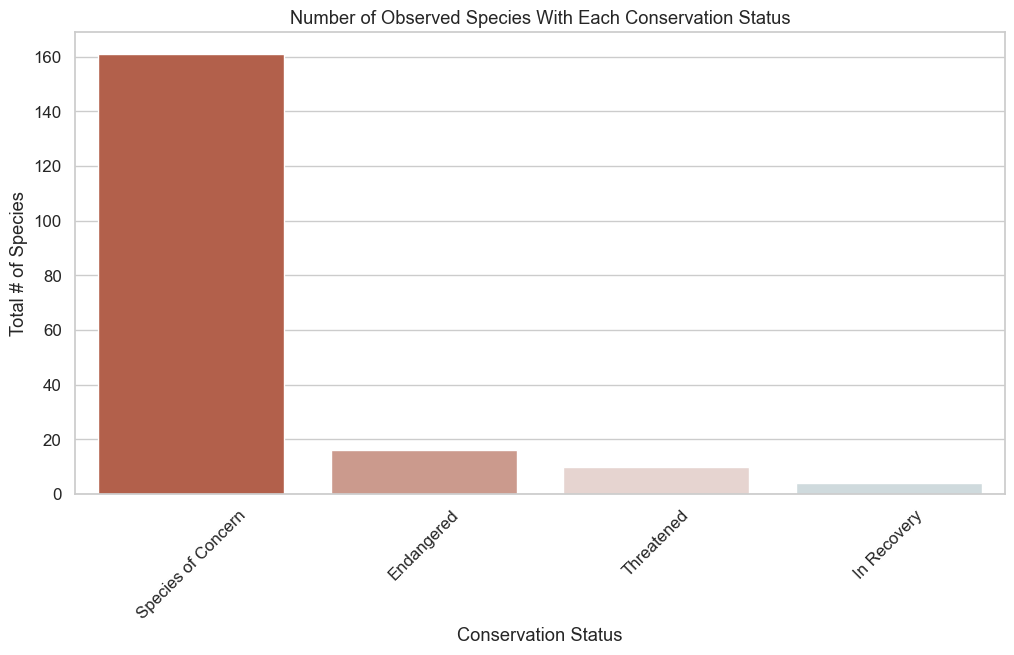

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='conservation_status', data=species, order=species['conservation_status'].value_counts().index, palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species With Each Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Total # of Species")
plt.xticks(rotation = 45)
plt.savefig('numspeciesbystatus.png')
plt.show()
plt.close()

Below, the number of species - as well as their equivalent percentages - in each taxonomic category are found and displayed in a bar chart.

In [63]:
print("Number of Species in Each Taxonomic Category")
species_per_category = species['category'].value_counts()
print(species_per_category)
print('')
print("Percentage of Species in Each Taxonomic Category")
num_category = len(species.category)
percent_per_category = (species_per_category/num_category)*100
print(round(percent_per_category, 3))

#Of all taxonomic categories, Vascular plants have the most observations. Birds are second highest, but with less than an eighth of the total number of observations that Vascular Plants have.

Number of Species in Each Taxonomic Category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

Percentage of Species in Each Taxonomic Category
Vascular Plant       76.751
Bird                  8.946
Nonvascular Plant     5.718
Mammal                3.674
Fish                  2.181
Amphibian             1.374
Reptile               1.356
Name: category, dtype: float64


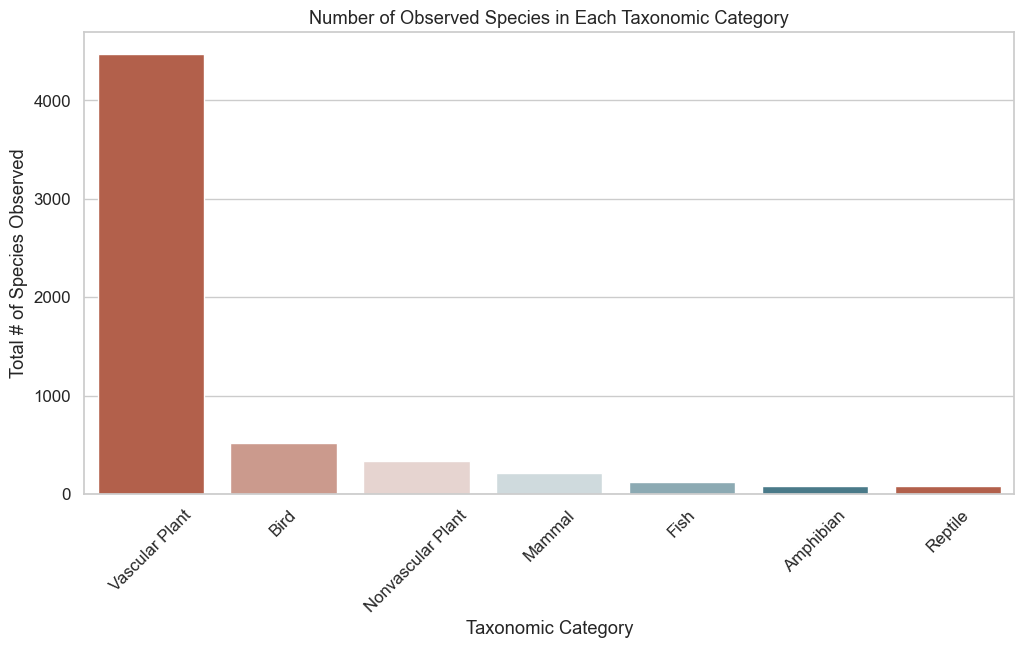

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='category', data=species, order=species['category'].value_counts().index, palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Taxonomic Category")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed")
plt.xticks(rotation = 45)
plt.savefig('numspeciesbycategory.png')
plt.show()
plt.close()

We can see that the Vascular Plant category makes up the majority of total observed species. The Bird category is second, with less than an eighth of the total number of Vasular Plant species. The Reptile category has the fewest number of observed species, with only 79 species. That's only one fewer than the number of Amphibian species.

Below is the breakdown of observed species in each category by conservation status.

In [34]:
status_by_category = pd.crosstab(species.category, species.conservation_status)
print(status_by_category)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  72           0
Fish                          3            0                   4           4
Mammal                        7            1                  28           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2


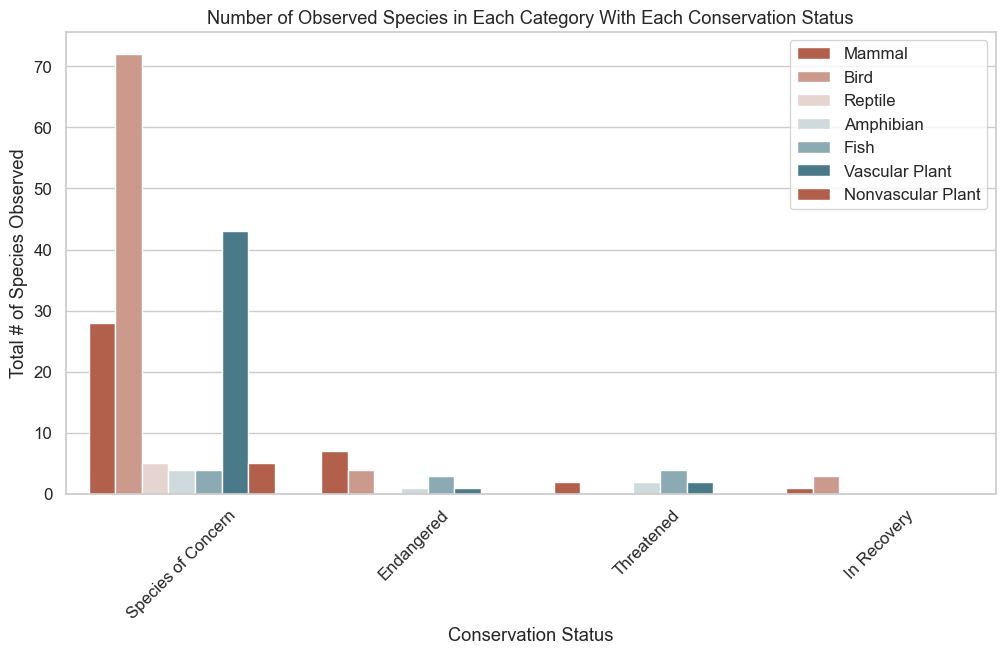

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='conservation_status', data=species, hue='category', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Category With Each Conservation Status")
plt.xlabel("Conservation Status")
plt.ylabel("Total # of Species Observed")
plt.xticks(rotation = 45)
plt.legend(loc='upper right')
plt.savefig('categorybystatus.png')
plt.show()
plt.close()

The Bird category is the category with the highest number of species in the 'Species of Concern' status, followed up by species of Vascular Plants at a little less than half the number of bird species. Amphibian and Fish species are tied for the fewest species in the 'Species of Concern' Category. The Amphibian and Vascular Plant categories are tied for fewest species in both the 'Endangered' and 'Threatened' categories.

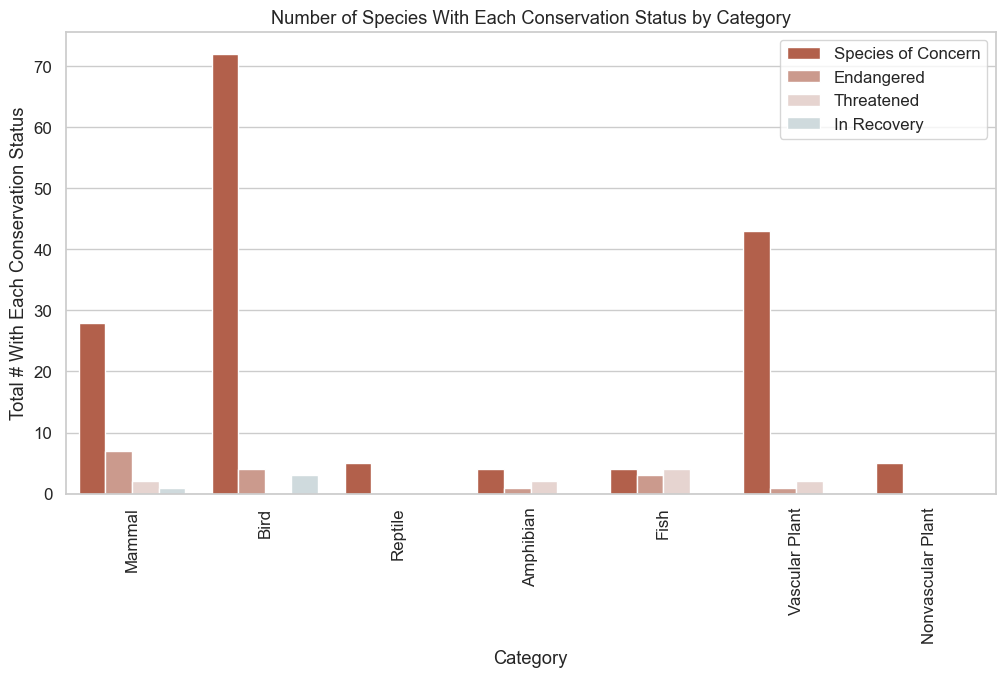

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='category', data=species, hue='conservation_status', palette = sns.diverging_palette(20, 220))
plt.title("Number of Species With Each Conservation Status by Category")
plt.xlabel("Category")
plt.ylabel("Total # With Each Conservation Status")
plt.xticks(rotation = 90)
plt.legend(loc='upper right')
plt.savefig('statusbycategory.png')
plt.show()
plt.close()

Next we find the total number of protected vs unprotected species in each category, along with the percentage of protected species for each category.

In [40]:
category_totals = status_by_category.sum(axis=1).reset_index(name='protected')
unprotected = species.category[species['conservation_status'].isnull()].value_counts().sort_index().values
category_totals['unprotected'] = unprotected
category_totals['rate_of_protection'] = category_totals.protected / (category_totals.protected + category_totals.unprotected) * 100
category_totals

,category,protected,unprotected,rate_of_protection
0,Amphibian,7,73,8.750000
1,Bird,79,442,15.163148
2,Fish,11,116,8.661417
3,Mammal,38,176,17.757009
4,Nonvascular Plant,5,328,1.501502
5,Reptile,5,74,6.329114
6,Vascular Plant,46,4424,1.029083


Let's check if any of these differences in percentage of protected species by category is at all significant. First, we'll look at all categories included:

In [41]:
print("Chi-Square Test for All Species")
contingency_table = category_totals.drop('rate_of_protection', axis=1).set_index('category')

chi2, pval, dof, expected = chi2_contingency(contingency_table)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

Chi-Square Test for All Species
3.095911909904608e-98
significant


Next, we'll look at it by a couple of species with main interest. The Mammal and Bird categories have the highest percentages of protected species. We'll use a Chi-Square Test to see if the difference between their rate of protection is significant.

In [42]:
print("Chi-Square Test for Mammals and Bird")
mammal_bird = contingency_table.loc[['Mammal','Bird']]
display(mammal_bird)

chi2, pval, dof, expected = chi2_contingency(mammal_bird)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

Chi-Square Test for Mammals and Bird


,protected,unprotected
category,,
Mammal,38,176
Bird,79,442


0.445901703047197
not significant


Because the p-value of this test is greater than 0.05, we now know that the difference in rate of protection for Birds and Mammals is not statistically significant.

What about the difference between rate of protection for Birds and Vascular Plants? Vascular Plants have the second highest number of protected species, but their rate of protection falls at 3rd highest.

In [43]:
print("Chi-Square Test for Birds and Vascular Plants")
bird_plant = contingency_table.loc[['Bird','Vascular Plant']]
display(bird_plant)

chi2, pval, dof, expected = chi2_contingency(bird_plant)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

Chi-Square Test for Birds and Vascular Plants


,protected,unprotected
category,,
Bird,79,442
Vascular Plant,46,4424


9.296288431402029e-84
significant


The p-value for this test is smaller than 0.05, meaning that the difference between rate of protection for Birds vs Vascular Plants is statistically significant.

Next, let's look at the difference between rate of protection between Birds and Amphibians as well as between Birds and Fish. Amphibians and Fish take 4th and 5th place in rate of protection. They're also very close in their rates of protection vs any of the other species categories.

In [44]:
print("Chi-Square Test for Birds and Amphibians")
bird_amphibian = contingency_table.loc[['Bird','Amphibian']]
display(bird_amphibian)

chi2, pval, dof, expected = chi2_contingency(bird_amphibian)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

Chi-Square Test for Birds and Amphibians


,protected,unprotected
category,,
Bird,79,442
Amphibian,7,73


0.17582779760374145
not significant


In [45]:
print("Chi-Square Test for Birds and Fish")
bird_fish = contingency_table.loc[['Bird','Fish']]
display(bird_fish)

chi2, pval, dof, expected = chi2_contingency(bird_fish)
print(pval)
print('significant' if pval < 0.05 else 'not significant')

Chi-Square Test for Birds and Fish


,protected,unprotected
category,,
Bird,79,442
Fish,11,116


0.07897198996788664
not significant


The p-vale for both tests comes back at higher than 0.05. The difference between rate of protection for Birds and Amphibians, as well as between Birds and Fish, is not statistically significant.

## Import & Inspect Observations Data
Below, the observations dataframe is created and the first few rows are displayed using the .head() method. It contains the following columns of data:
* scientific_name: the scientific name of each species
* park_name: the national park in which the species were seen
* observations: the number of times each species was seen at that park

The two data sets share one column, the scientific_name column.

Using .nunique(), we can see that the park_name column has only 4 unique values. Using .isna().any(), we can also see that there are no columns in this data set have any null values.

In [46]:
#observations data import and initial inspection
observations = pd.read_csv('observations.csv')
print('Data 2: Observations')
display(observations.head(10))
print(observations.info())
print(observations.nunique())
display(observations.isna().any())

Data 2: Observations


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
scientific_name    5541
park_name             4
observations        304
dtype: int64


scientific_name    False
park_name          False
observations       False
dtype: bool

Because there are so few unique values for the park_name column, .unique() is used to display its unique values.

In [47]:
print('Observations Data: Unique Park Name Values')
display(observations.park_name.unique())

Observations Data: Unique Park Name Values


array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

The two data sets are merged to be able to work with information from both data frames. Then the columns 'park_name', 'category', and 'observations' are selected and saved as category_parks.

In [53]:
species_obs = pd.merge(observations, species)
print('Merged Data: Species & Observations')
display(species_obs.head(10))

Merged Data: Species & Observations


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,NaN


In [62]:
print("Total Number of Observations in Each Park")
total_obs_by_park = category_parks.groupby('park_name').observations.sum()
print(total_obs_by_park)
print("")
print("Total Percentage of Observations in Each Park")
total_observations = category_parks.observations.sum()
percent_obs_per_park = (total_obs_by_park/total_observations)*100
print(round(percent_obs_per_park, 3))

Total Number of Observations in Each Park
park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64

Total Percentage of Observations in Each Park
park_name
Bryce National Park                    17.373
Great Smoky Mountains National Park    13.027
Yellowstone National Park              43.554
Yosemite National Park                 26.046
Name: observations, dtype: float64


Yellowstone National Park has the highest number of total observations within thier park. This could be do to the fact that the park is larger. It makes up about 44% of total observations recorded. Great Smoky Mountains National Park, the smallest park, has the fewest number of observations.

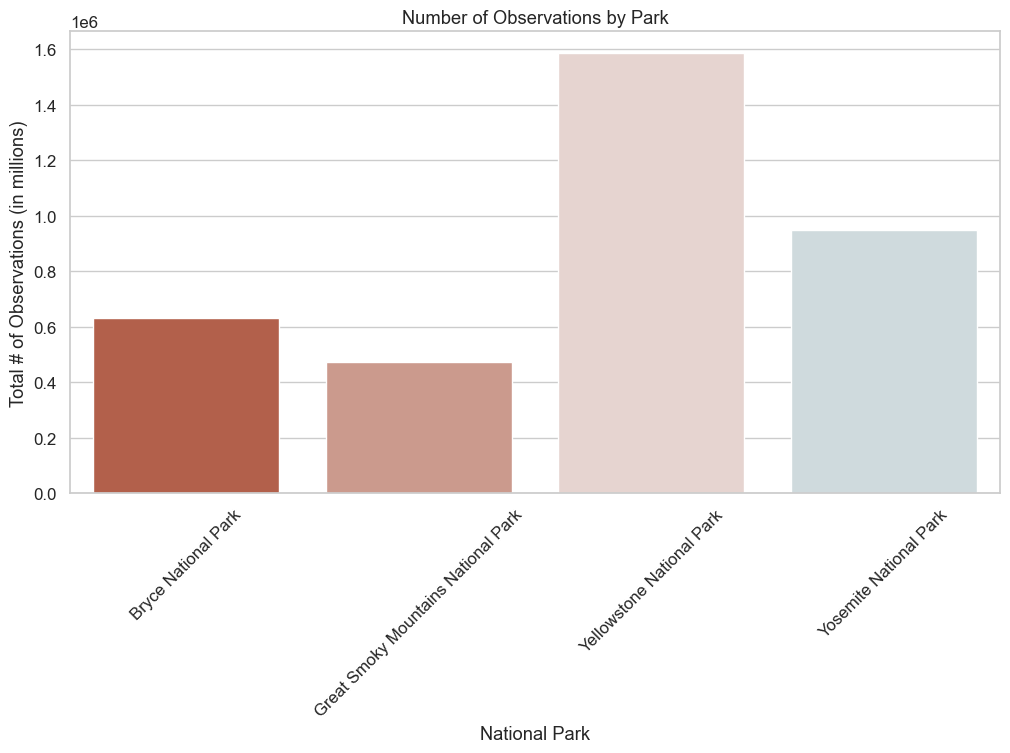

In [65]:
total_observations_parks = pd.DataFrame([
    ['Bryce National Park', 633043],
    ['Great Smoky Mountains National Park', 473979],
    ['Yellowstone National Park', 1584890],
    ['Yosemite National Park', 948460],],
    columns = ['park_name', 'total_observations'])

#Visual
plt.figure(figsize=(12,6))
sns.barplot(data=total_observations_parks, x='park_name', y='total_observations', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observations by Park")
plt.xlabel("National Park")
plt.ylabel("Total # of Observations (in millions)")
plt.xticks(rotation = 45)
plt.savefig('parkobservationstotal.png')
plt.show()
plt.close()

Below is a visualization of category_parks, showing the number of observed species in each national park by category.

Taxonomic Category by Park


,park_name,category,observations
0,Bryce National Park,Amphibian,7542
1,Bryce National Park,Bird,58590
2,Bryce National Park,Fish,12823
3,Bryce National Park,Mammal,28830
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,8141
6,Bryce National Park,Vascular Plant,484373
7,Great Smoky Mountains National Park,Amphibian,5876
8,Great Smoky Mountains National Park,Bird,42869
9,Great Smoky Mountains National Park,Fish,9482


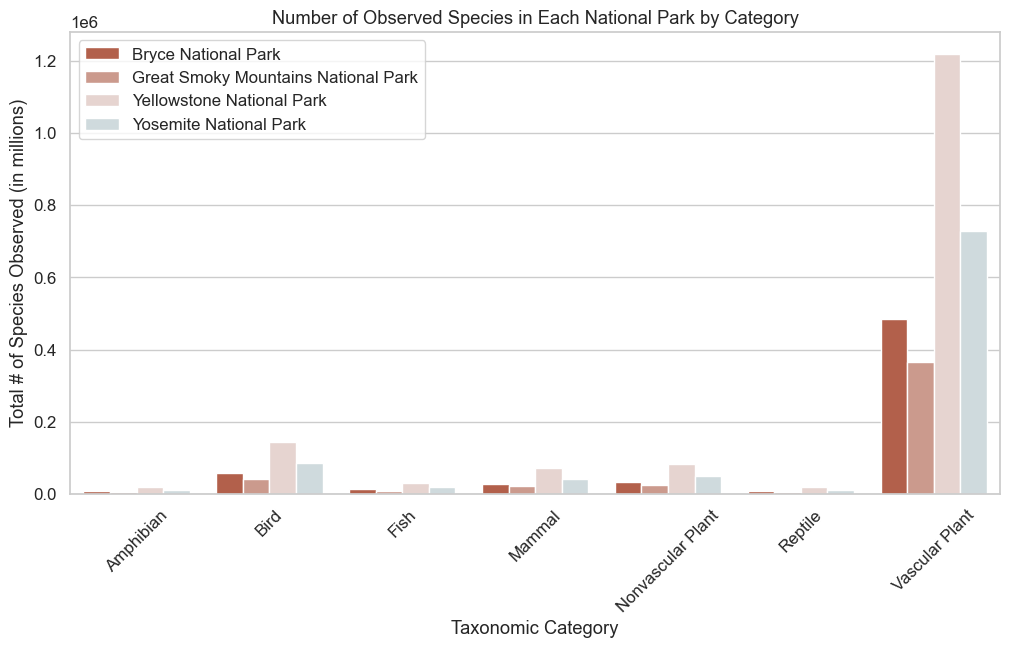

In [57]:
category_parks = species_obs.groupby(['park_name', 'category'])['observations'].sum().reset_index().sort_values(['park_name', 'category'], ascending=True)
print('Taxonomic Category by Park')
display(category_parks.head(10))

#category_parks graph
plt.figure(figsize=(12,6))
sns.barplot(data=category_parks, x='category', y='observations', hue='park_name', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each National Park by Category")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed (in millions)")
plt.xticks(rotation = 45)
plt.legend()
plt.savefig('speciesparkbycategory.png')
plt.show()
plt.close()

category_parks is now split into four dataframes. The data in those dataframes is then displayed in four separate bar charts to show the number of species in each category by park.

In [66]:
grouped_df = category_parks.groupby(category_parks['park_name'])

yellowstone_observations = grouped_df.get_group('Yellowstone National Park').reset_index()
print('Yellowstone National Park Observations')
display(yellowstone_observations.head(10))

bryce_observations = grouped_df.get_group('Bryce National Park').reset_index()
print('Bryce National Park Observations')
display(bryce_observations.head(10))

yosemite_observations = grouped_df.get_group('Yosemite National Park').reset_index()
print('Yosemite National Park Observations')
display(yosemite_observations.head(10))

smoky_observations = grouped_df.get_group('Great Smoky Mountains National Park').reset_index()
print('Great Smoky Mountains National Park Observations')
display(smoky_observations.head(10))

Yellowstone National Park Observations


,index,park_name,category,observations
0,14,Yellowstone National Park,Amphibian,19937
1,15,Yellowstone National Park,Bird,144300
2,16,Yellowstone National Park,Fish,31459
3,17,Yellowstone National Park,Mammal,70701
4,18,Yellowstone National Park,Nonvascular Plant,83021
5,19,Yellowstone National Park,Reptile,20061
6,20,Yellowstone National Park,Vascular Plant,1218162


Bryce National Park Observations


,index,park_name,category,observations
0,0,Bryce National Park,Amphibian,7542
1,1,Bryce National Park,Bird,58590
2,2,Bryce National Park,Fish,12823
3,3,Bryce National Park,Mammal,28830
4,4,Bryce National Park,Nonvascular Plant,32992
5,5,Bryce National Park,Reptile,8141
6,6,Bryce National Park,Vascular Plant,484373


Yosemite National Park Observations


,index,park_name,category,observations
0,21,Yosemite National Park,Amphibian,11713
1,22,Yosemite National Park,Bird,86612
2,23,Yosemite National Park,Fish,19137
3,24,Yosemite National Park,Mammal,42533
4,25,Yosemite National Park,Nonvascular Plant,49783
5,26,Yosemite National Park,Reptile,11779
6,27,Yosemite National Park,Vascular Plant,727895


Great Smoky Mountains National Park Observations


,index,park_name,category,observations
0,7,Great Smoky Mountains National Park,Amphibian,5876
1,8,Great Smoky Mountains National Park,Bird,42869
2,9,Great Smoky Mountains National Park,Fish,9482
3,10,Great Smoky Mountains National Park,Mammal,21056
4,11,Great Smoky Mountains National Park,Nonvascular Plant,24857
5,12,Great Smoky Mountains National Park,Reptile,5841
6,13,Great Smoky Mountains National Park,Vascular Plant,364882


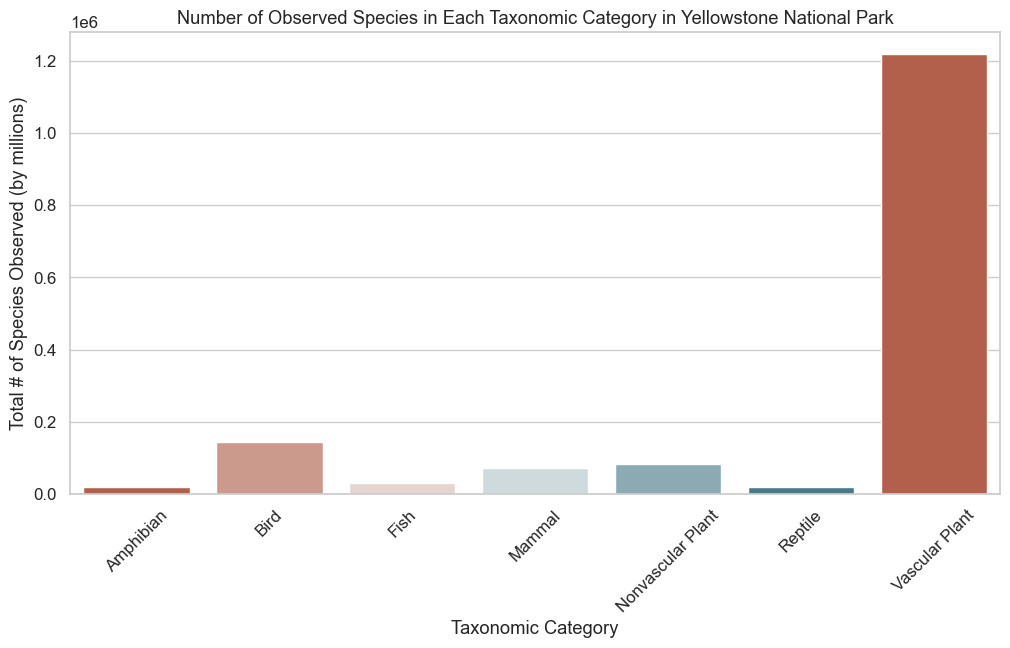

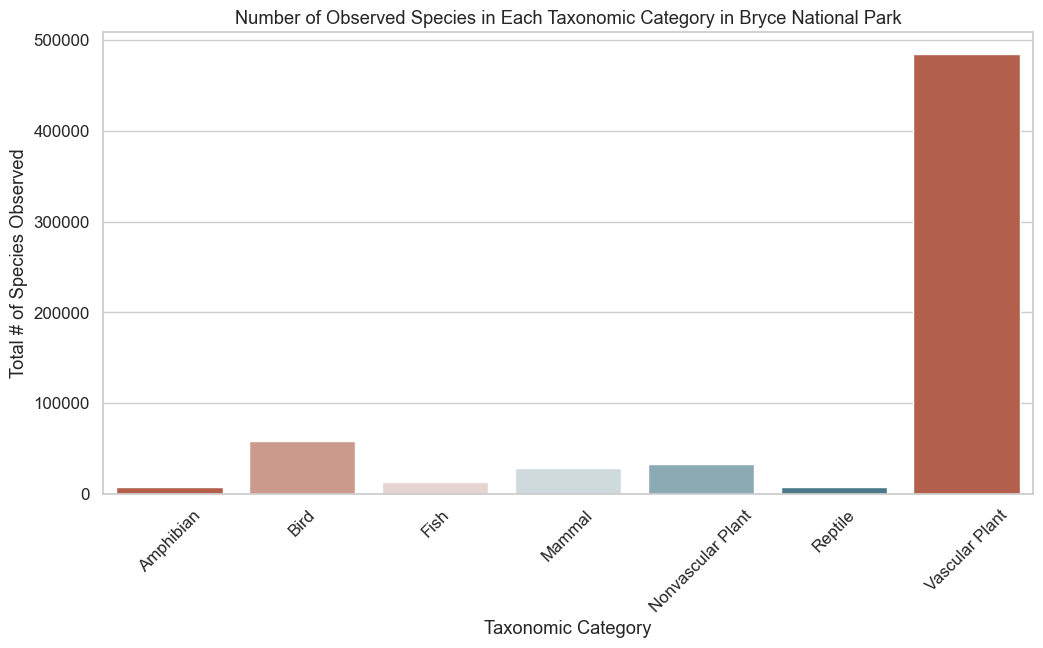

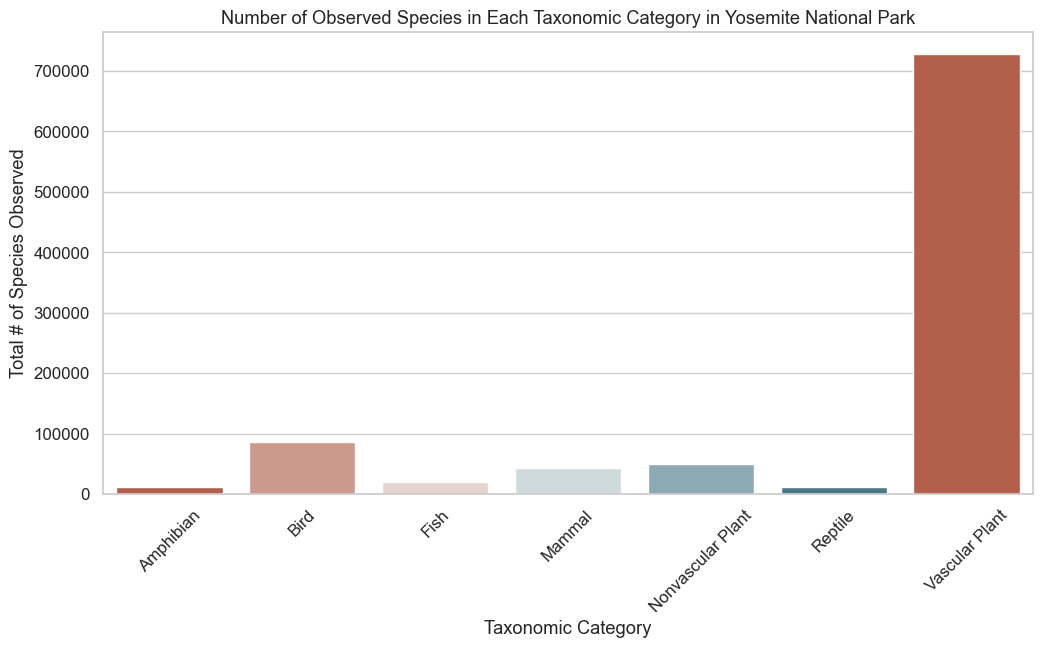

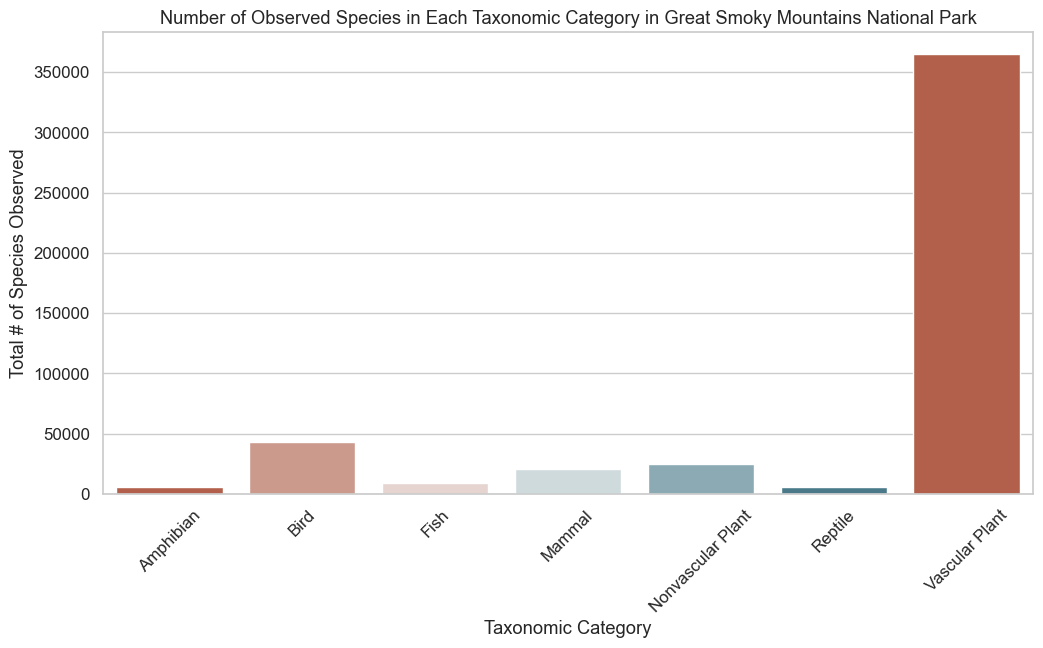

In [67]:
#Table for Yellowstone National Park
plt.figure(figsize=(12,6))
sns.barplot(data=yellowstone_observations, x='category', y='observations', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Taxonomic Category in Yellowstone National Park")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed (by millions)")
plt.xticks(rotation = 45)
plt.savefig('categoryinyellowstone.png')
plt.show()
plt.close()

#Table for Bryce National Park
plt.figure(figsize=(12,6))
sns.barplot(data=bryce_observations, x='category', y='observations', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Taxonomic Category in Bryce National Park")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed")
plt.xticks(rotation = 45)
plt.savefig('categoryinbryce.png')
plt.show()
plt.close()

#Table for Yosemite National Park
plt.figure(figsize=(12,6))
sns.barplot(data=yosemite_observations, x='category', y='observations', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Taxonomic Category in Yosemite National Park")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed")
plt.xticks(rotation = 45)
plt.savefig('categoryinyosemite.png')
plt.show()
plt.close()

#Table for Great Smoky Mountains National Park
plt.figure(figsize=(12,6))
sns.barplot(data=smoky_observations, x='category', y='observations', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species in Each Taxonomic Category in Great Smoky Mountains National Park")
plt.xlabel("Taxonomic Category")
plt.ylabel("Total # of Species Observed")
plt.xticks(rotation = 45)
plt.savefig('categoryinsmoky.png')
plt.show()
plt.close()

#Overall, vascular plants were taxonomic category spotted the most at each park.

status_parks is created to work with the number of species in each conservation status by park. Another bar chart is then made to show that information.

In [68]:
status_parks = species_obs.groupby(['park_name', 'conservation_status'])['observations'].sum().reset_index().sort_values(['park_name'], ascending=True)
print('Conservation Status in Each Park')
display(status_parks)

Conservation Status in Each Park


,park_name,conservation_status,observations
0,Bryce National Park,Endangered,619
1,Bryce National Park,In Recovery,388
2,Bryce National Park,Species of Concern,17011
3,Bryce National Park,Threatened,591
4,Great Smoky Mountains National Park,Endangered,393
5,Great Smoky Mountains National Park,In Recovery,248
6,Great Smoky Mountains National Park,Species of Concern,11735
7,Great Smoky Mountains National Park,Threatened,440
8,Yellowstone National Park,Endangered,1558
9,Yellowstone National Park,In Recovery,889


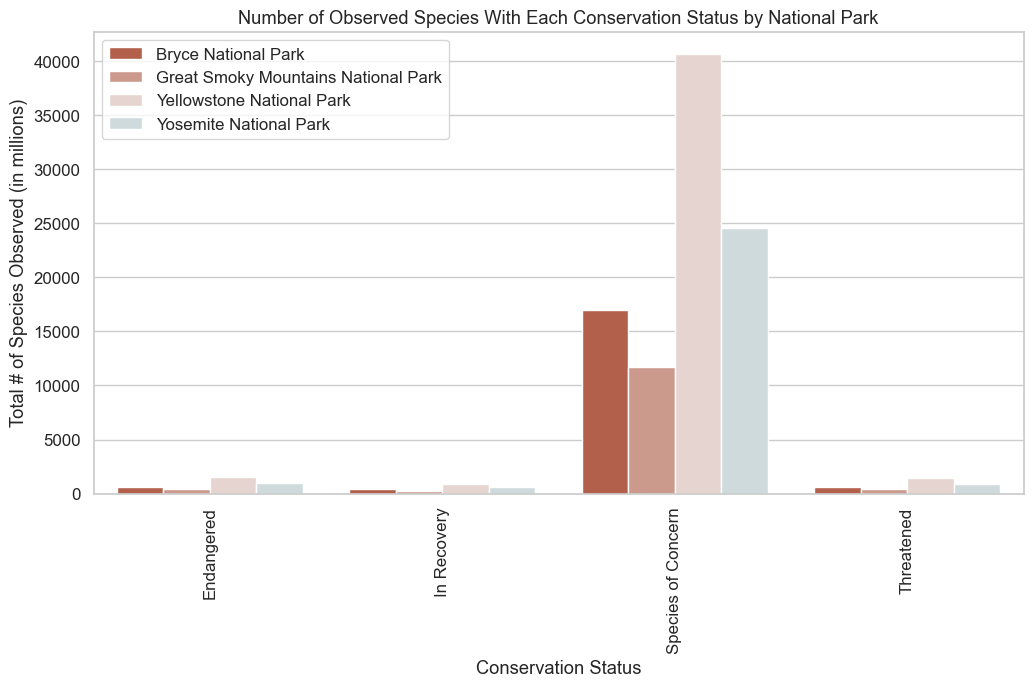

In [69]:
#status_parks graph
plt.figure(figsize=(12,6))
sns.barplot(data=status_parks, x='conservation_status', y='observations', hue='park_name', palette = sns.diverging_palette(20, 220))
plt.title("Number of Observed Species With Each Conservation Status by National Park")
plt.xlabel("Conservation Status")
plt.ylabel("Total # of Species Observed (in millions)")
plt.xticks(rotation = 90)
plt.legend()
plt.savefig('categoryobservationsbypark.png')
plt.show()
plt.close()